### Building a multiple linear regression model for the prediction of demand for shared bikes for a US bike-sharing provider "BoomBikes"

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("day.csv")

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
df.shape

(730, 16)

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [347]:
# Treating "season" column

In [11]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [12]:
def ass_season(x):
    if x == 1:
        return "spring"
    elif x == 2:
        return "summer"
    elif x ==3:
        return "fall"
    elif x == 4:
        return "winter"

In [13]:
df.season = df.season.apply(ass_season)

In [14]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
# checking for updated "season" column
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
#Treating "mnth" column

In [17]:
df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [18]:
def ass_mnth(x):
    if x == 1:
        return "Jan"
    if x == 2:
        return "Feb"
    if x == 3:
        return "Mar"
    if x == 4:
        return "Apr"
    if x == 5:
        return "May"
    if x == 6:
        return "Jun"
    if x == 7:
        return "July"
    if x == 8:
        return "Aug"
    if x == 9:
        return "Sept"
    if x == 10:
        return "Oct"
    if x == 11:
        return "Nov"
    if x == 12:
        return "Dec"

In [19]:
df.mnth = df.mnth.apply(ass_mnth)

In [20]:
df.mnth.value_counts()

Dec     62
May     62
Mar     62
Oct     62
Jan     62
Aug     62
July    62
Jun     60
Apr     60
Sept    60
Nov     60
Feb     56
Name: mnth, dtype: int64

In [21]:
#checking updated "mnth" column
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
#Treating "weekday" column

In [23]:
df.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [24]:
def ass_weekday(x):
    if x == 0:
        return "Sun"
    if x == 1:
        return "Mon"
    if x == 2:
        return "Tues"
    if x == 3:
        return "Wed"
    if x == 4:
        return "Thurs"
    if x == 5:
        return "Fri"
    if x == 6:
        return "Sat"

In [25]:
df.weekday = df.weekday.apply(ass_weekday)

In [26]:
df.weekday.value_counts()

Mon      105
Tues     105
Fri      104
Sun      104
Thurs    104
Sat      104
Wed      104
Name: weekday, dtype: int64

In [27]:
#checking updated "weekday" column
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [28]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [29]:
def ass_weathersit(x):
    if x == 1:
        return "Clear/Partly Cloudy"
    if x == 2:
        return "Mist/Broken Clouds"
    if x == 3:
        return "Light Snow/Light Rain"
    if x == 4:
        return "Heavy Rain/Snow & Fog"

In [30]:
df.weathersit = df.weathersit.apply(ass_weathersit)

In [31]:
df.weathersit.value_counts()

Clear/Partly Cloudy      463
Mist/Broken Clouds       246
Light Snow/Light Rain     21
Name: weathersit, dtype: int64

In [32]:
#checking updated "weathersit" column
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist/Broken Clouds,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,1,Mist/Broken Clouds,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [33]:
#converting datatype of "dteday" column to "datetime64"
df.dteday = df.dteday.astype("datetime64")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Dropping columns that are unwanted for our model

In [35]:
df.drop(["instant", "dteday","atemp","casual","registered"], axis = 1, inplace = True)

In [36]:
#checking dataframe after dropping above columns
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Data visualization for Numerical columns

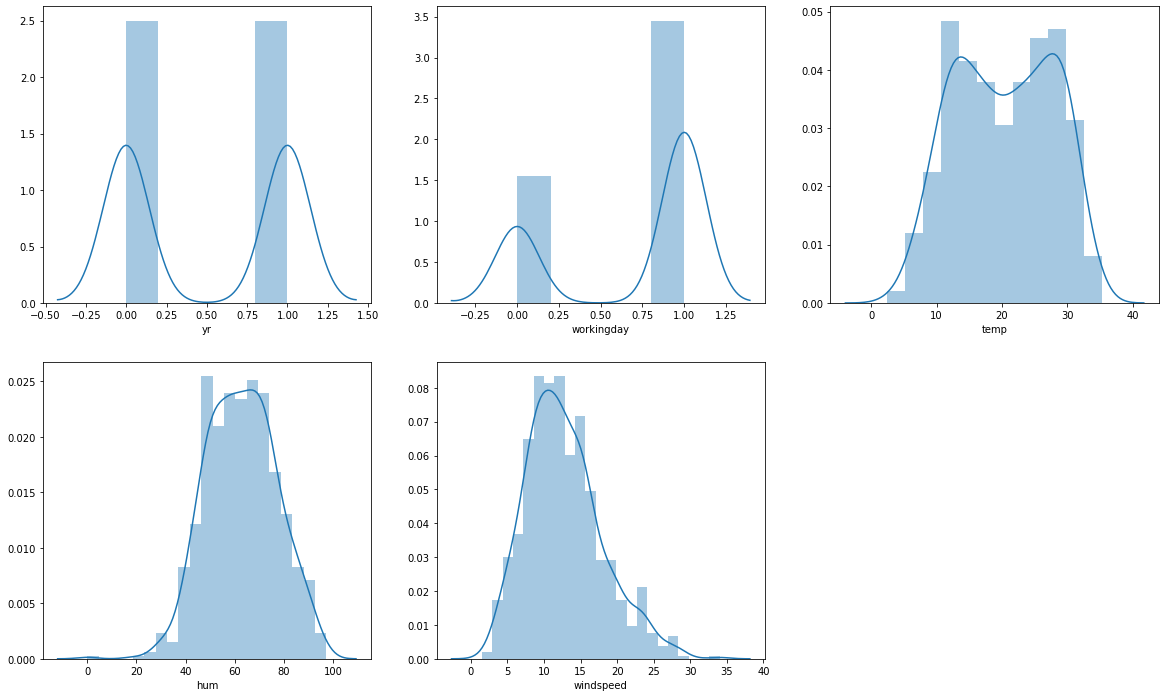

In [37]:
# plotting distplot

plt.figure(figsize = (20,12))

plt.subplot(2,3,1)
sns.distplot(df["yr"])

plt.subplot(2,3,2)
sns.distplot(df["workingday"])

plt.subplot(2,3,3)
sns.distplot(df["temp"])

plt.subplot(2,3,4)
sns.distplot(df["hum"])

plt.subplot(2,3,5)
sns.distplot(df["windspeed"])


#### Insights from above distplot
1. "hum" and "windspeed" are clearly normally distributed
2. Cannot say that the distribution of "temp" column is normal.
3. In columns "yr" and "workingday" we have only 0's and 1's as their values. Considering this and looking at their individual distributions, both the values - 0 and 1 are normally distributed.

#### Data Visualization for Categorical columns

Plotting boxplot for each categorical variable to identify the outliers

In [38]:
#Retrieving categorical columns

df_categorical = df.select_dtypes(include = ["object"])
df_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

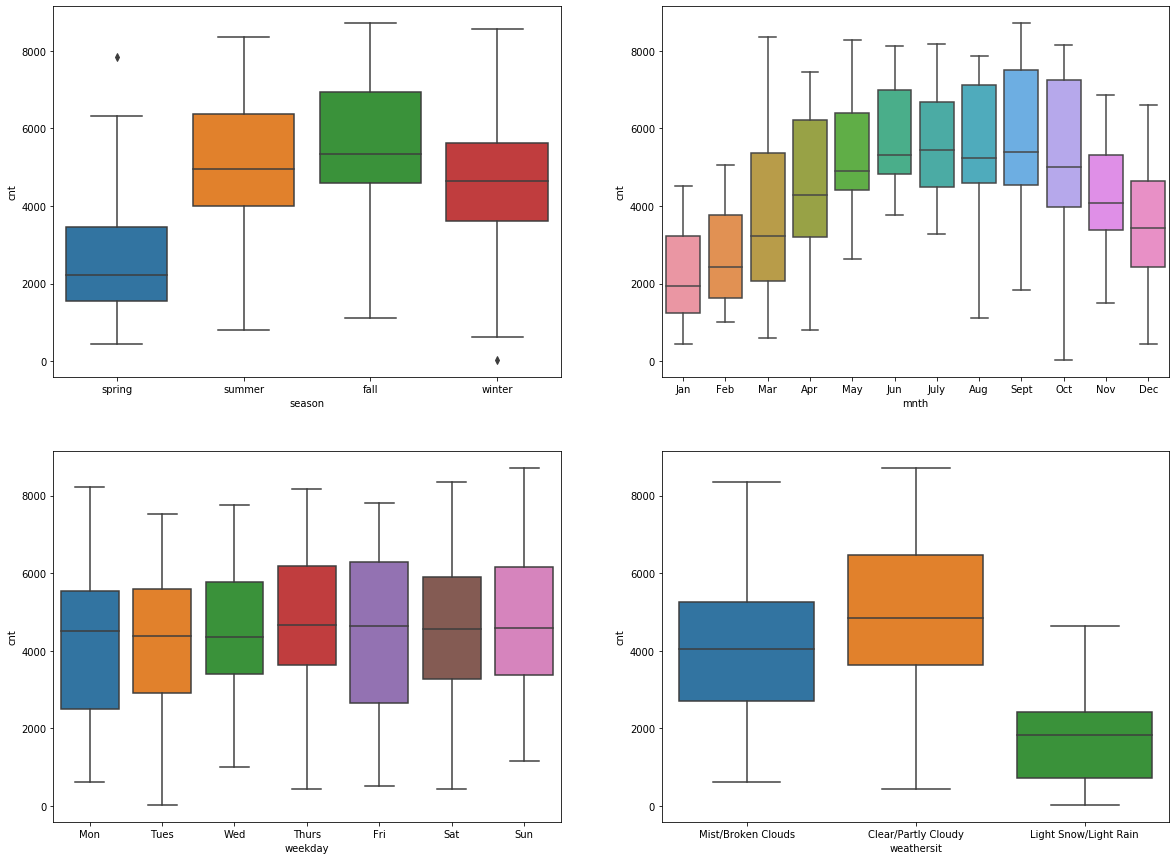

In [39]:
# plotting boxplot
plt.figure(figsize = (20,15))

plt.subplot(2,2,1)
sns.boxplot(x = "season", y = "cnt", data=df) 

plt.subplot(2,2,2)
sns.boxplot(x = "mnth", y = "cnt", data=df)

plt.subplot(2,2,3)
sns.boxplot(x = "weekday", y = "cnt", data=df)

plt.subplot(2,2,4)
sns.boxplot(x = "weathersit", y = "cnt", data=df) 

#### Insights from above boxplot:

Firstly, except for a single value in the "spring" category and one value in "winter" category of "season" column, we dont have any outliers in our data.

"season" column:

- "min" value in all the four seasons lies in the same range: 0-2000
- "max" value in "spring" is in between 6000 and 8000 where as in other three seasons, "summer", "fall" and "winter", it is above 8000
- Fewer values in "spring" compared to other seasons.
- "cnt" has maximum value during "fall"

"mnth" column:

- "cnt" observed it's least value in the month of October and highest value inthe month of September
- For most of the months (8), average "cnt" value is in between 4000 and 6000

"weekday" column:

- "cnt" is least on Tuesday and highest on Sunday
- Irrespective of the day of the week, the average "cnt" lies in the range 4000-6000

"weathersit" column:

- Interquartile range of "Light Snow/ Light Rain" is comparatively very low w.r.t other weather conditions
- More number of "cnt" values are observed when the weather is "Clear/ Partly Coludy"

#### Plotting a pairplot to analyse the numerical variables

In [40]:
# retrieving integer variables
df.describe().columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [41]:
IV = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt']

for var in IV:
    df[var] = df[var].astype("float")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    float64
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    float64
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    float64
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    float64
dtypes: float64(7), object(4)
memory usage: 62.9+ KB


In [43]:
# Selecting all numerical features

df_numeric = df.select_dtypes(include = ["float64"])
df_numeric.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0.0,0.0,1.0,14.110847,80.5833,10.749882,985.0
1,0.0,0.0,1.0,14.902598,69.6087,16.652113,801.0
2,0.0,0.0,1.0,8.050924,43.7273,16.636703,1349.0
3,0.0,0.0,1.0,8.200000,59.0435,10.739832,1562.0
4,0.0,0.0,1.0,9.305237,43.6957,12.522300,1600.0


Ideally the columns "yr", "holiday", "workingday" can be excluded while plotting pair plot. This is because their values are 0/1, which doesn't provide any insights in our model building.

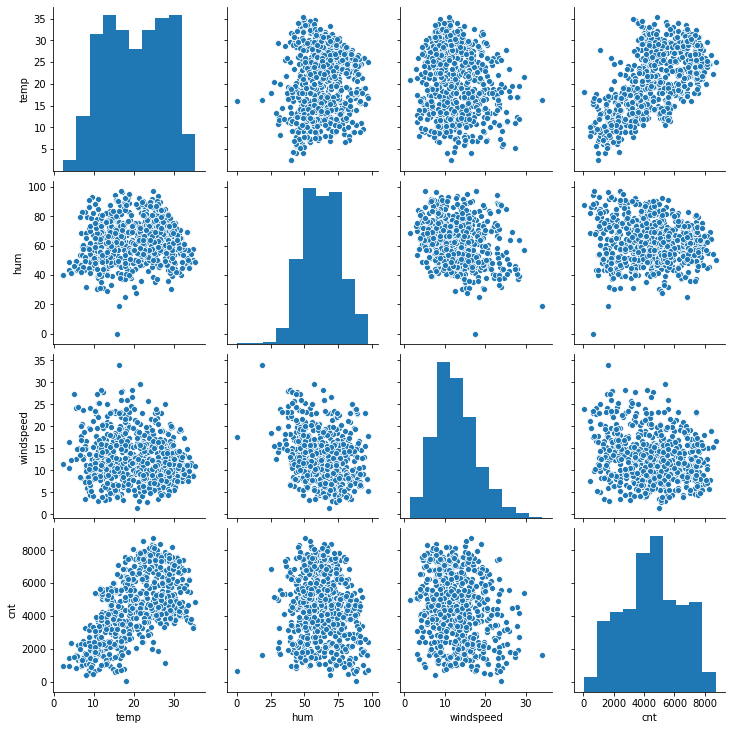

In [44]:
# Plotting pairplot

sns.pairplot(df_numeric[["temp","hum","windspeed","cnt"]])

#### Insights from above pairplot:

- "temp" has higher correlation with "cnt" (the target variable).

#### Correlation Matrix

In [45]:
cor = df_numeric.corr()
cor

,yr,holiday,workingday,temp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.128565,-0.158186,0.627044
hum,-0.112547,-0.015662,0.053770,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,-0.098543,-0.235132,1.000000


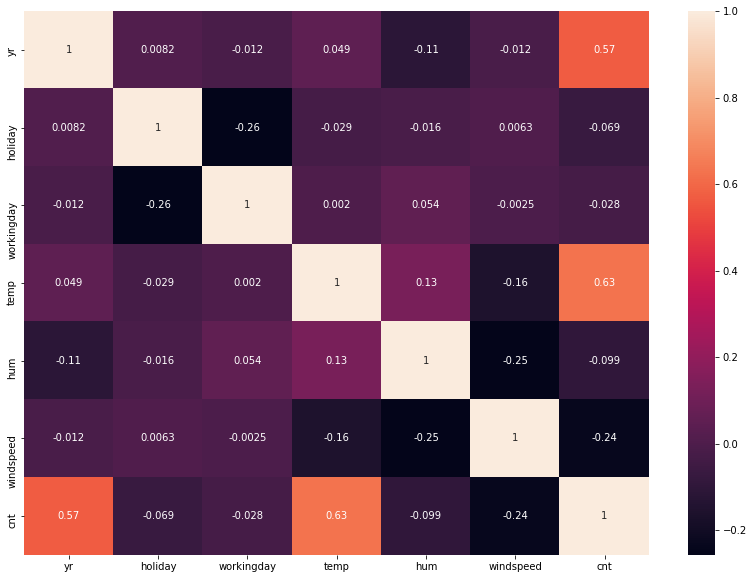

In [46]:
# plotting heat map

plt.figure(figsize = (14,10))
sns.heatmap(cor, annot = True)

#### Insights from the above heatmap:

1. "temp" has highest correlation with our target variable, "cnt"
2. "yr" and "cnt" are also strongly correlated
3. "yr" and "holiday" are least correlated.

#### Modeling.

In [47]:
# OHE of the categorical columns

In [48]:
df_categorical = df.select_dtypes(include = ["object"])
df_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [ ]:
# Creating dummies

In [49]:
df_dummies = pd.get_dummies(df_categorical, drop_first = True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow/Light Rain,weathersit_Mist/Broken Clouds
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In the next step, we are going to drop all the categorical columns in our dataframe (df) as we have already encoded them using 0's and 1's by creating dummies.

In [50]:
df.drop(df_categorical.columns, axis = 1, inplace = True)

In [51]:
# checking the columns in the dataframe
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [52]:
# concatinating the dummies' dataframe with original dataframe
df = pd.concat([df,df_dummies], axis = 1)

In [53]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow/Light Rain,weathersit_Mist/Broken Clouds
0,0.0,0.0,1.0,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.0,0.0,1.0,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.0,0.0,1.0,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0.0,1.0,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,1.0,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Scaling of the Numerical Features

In [54]:
X = df.drop("cnt", axis = 1)
y = df.cnt

In [55]:
X.shape

(730, 28)

In [56]:
y.shape

(730,)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [58]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow/Light Rain,weathersit_Mist/Broken Clouds
653,1.0,0.0,1.0,19.201653,55.8333,12.208807,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1.0,0.0,1.0,29.246653,70.4167,11.083475,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1.0,0.0,0.0,16.980847,62.1250,10.792293,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1.0,0.0,1.0,10.489153,48.3333,23.500518,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1.0,0.0,0.0,15.443347,48.9583,8.708325,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [59]:
X_train.describe().columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues',
       'weekday_Wed', 'weathersit_Light Snow/Light Rain',
       'weathersit_Mist/Broken Clouds'],
      dtype='object')

In [60]:
# Scaling numerical columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [61]:
var = ['temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues',
       'weekday_Wed', 'weathersit_Light Snow/Light Rain',
       'weathersit_Mist/Broken Clouds']

In [62]:
X_train[var] = scaler.fit_transform(X_train[var])

In [63]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow/Light Rain,weathersit_Mist/Broken Clouds
653,1.0,0.0,1.0,0.509887,0.575354,0.300794,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
728,1.0,0.0,1.0,0.245101,0.498067,0.663106,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Preparing our model.

In [ ]:
# Training and making predictions

In [64]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
# Finding the coefficients in the model

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ["Coefficients"])
coeff_df

,Coefficients
yr,2012.790344
holiday,-1170.523846
workingday,-511.116239
temp,3825.959267
hum,-1377.116124
windspeed,-1586.638236
season_spring,-351.414072
season_summer,404.224289
season_winter,977.312460
mnth_Aug,238.926496


In [66]:
# Finding the intercept of the model
regressor.intercept_

3416.296871918878

In [67]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues',
       'weekday_Wed', 'weathersit_Light Snow/Light Rain',
       'weathersit_Mist/Broken Clouds'],
      dtype='object')

In [68]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues',
       'weekday_Wed', 'weathersit_Light Snow/Light Rain',
       'weathersit_Mist/Broken Clouds'],
      dtype='object')

In [69]:
# Getting only those columns in X_train to X_test
# "var" contains the list of columns in X_train.

X_test[var] = scaler.transform(X_test[var])

In [70]:
y_pred = regressor.predict(X_test)

In [71]:
df = pd.DataFrame({"Actual": y_test, "Predict":y_pred})

In [72]:
df.head()

,Actual,Predict
184,6043.0,3562.485830
535,6211.0,7795.354495
299,2659.0,3763.996799
221,4780.0,5376.461365
152,4968.0,5261.060807


In [73]:
#Evaluating the algorithm

from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  580.8722082304406
Mean Squared Error:  615761.7888358686
Root Mean Squared Error:  784.7049055765285


In [74]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8283997096921474

In [75]:
# r2 and adjusted r2 for train data

yhat = regressor.predict(X_train)
SS_Residual = sum((y_train - yhat)**2)
SS_Total = sum((y_train - np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1 - r_squared)*(len(y_train) - 1)/(len(y_train) - X_train.shape[1] - 1)

print("r_squared: ", r_squared)
print("adjusted_r_squared: ", adjusted_r_squared)

r_squared:  0.8504120577951848
adjusted_r_squared:  0.8417223018164819


In [76]:
# r2 and adjusted r2 for test data

yhat = regressor.predict(X_test)
SS_Residual = sum((y_test - yhat)**2)
SS_Total = sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1 - r_squared)*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

print("r_squared: ", r_squared)
print("adjusted_r_squared: ", adjusted_r_squared)

r_squared:  0.8283997096921474
adjusted_r_squared:  0.803111245857306


### RFE

In [77]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [79]:
# Checking the columns' support and ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_Jun', False, 7),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 6),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 2),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thurs', False, 8),
 ('weekday_Tues', True, 1),
 ('weekday_Wed', False, 5),
 ('weathersit_Light Snow/Light Rain', True, 1),
 ('weathersit_Mist/Broken Clouds', True, 1)]

#### Build a model using statsmodel

In [80]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Nov,mnth_Sept,weekday_Sat,weekday_Sun,weekday_Tues,weathersit_Light Snow/Light Rain,weathersit_Mist/Broken Clouds
653,1.0,0.0,1.0,0.509887,0.575354,0.300794,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
728,1.0,0.0,1.0,0.245101,0.498067,0.663106,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [81]:
def build_model(X,y):
    X = sm.add_constant(X) # Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [82]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [83]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     137.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.17e-186
Time:                        16:00:55   Log-Likelihood:                -4114.7
No. Observations:                 511   AIC:                             8271.
Df Residuals:                     490   BIC:                             8360.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [84]:
# Dropping those columns with P-value>0.05

X_train_new = X_train_rfe.drop(["workingday","mnth_Feb","weekday_Sat", "weekday_Sun","weekday_Tues"], axis = 1)

Creating another model after dropping some insignificant columns

In [85]:
#create another model.
X_trian_new = build_model(X_train_new , y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.29e-189
Time:                        16:00:59   Log-Likelihood:                -4120.0
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     495   BIC:                             8340.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In the above model, all the P-values < 0.05 are selected. So, our above model can be considered as the best model.

#### Checking VIF to check for multicollinearity in the data, if any.

In [86]:
checkVIF(X_train_new)

,Features,VIF
3,hum,30.93
2,temp,17.82
4,windspeed,4.73
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.82
14,weathersit_Mist/Broken Clouds,2.32
0,yr,2.09
11,mnth_Nov,1.83
9,mnth_Jan,1.75


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [87]:
# Dropping those columns whose VIF value is > 5.
X_train_new = X_train_new.drop(["hum","temp"], axis = 1)

In [88]:
#create another model.
X_trian_new = build_model(X_train_new , y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.19e-160
Time:                        16:01:05   Log-Likelihood:                -4195.1
No. Observations:                 511   AIC:                             8418.
Df Residuals:                     497   BIC:                             8478.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [89]:
# Dropping those columns with P-value>0.05

X_train_new = X_train_rfe.drop(["season_winter","mnth_July"], axis = 1)

In [90]:
# Checking for VIF > 5, if any and dropping those columns
checkVIF(X_train_new)

,Features,VIF
2,workingday,39.43
4,hum,35.42
3,temp,18.94
14,weekday_Sun,8.07
13,weekday_Sat,7.77
5,windspeed,5.45
6,season_spring,4.36
10,mnth_Jan,2.49
17,weathersit_Mist/Broken Clouds,2.38
1,holiday,2.11


In [91]:
# Dropping those columns whose VIF value is > 5.
X_train_new = X_train_new.drop(["hum","temp","workingday","weekday_Sun","weekday_Sat","windspeed"], axis = 1)

In [92]:
#create another model.
X_trian_new = build_model(X_train_new , y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     149.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.62e-156
Time:                        16:01:14   Log-Likelihood:                -4206.8
No. Observations:                 511   AIC:                             8440.
Df Residuals:                     498   BIC:                             8495.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

All the P-values for above model are less than 0.05

In [93]:
# Checking for VIF > 5, if any and dropping those columns
checkVIF(X_train_new)

,Features,VIF
2,season_spring,3.16
6,mnth_Jan,2.12
5,mnth_Feb,1.84
0,yr,1.57
11,weathersit_Mist/Broken Clouds,1.44
3,season_summer,1.32
4,mnth_Dec,1.15
9,weekday_Tues,1.15
7,mnth_Nov,1.13
8,mnth_Sept,1.13


As we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model.

#### Residual Analysis of the Train Data

In [94]:
# getting the predicted values of "cnt"

lm = sm.OLS(y_train, X_train_new).fit()
y_train_cnt = lm.predict(X_train_new)

In [95]:
y_train_cnt

653    4133.442800
576    4133.442800
426    5279.736900
728    6008.878612
482    7155.615709
          ...     
578    4133.442800
53      295.033400
350    1801.666188
79     3022.172910
520    7155.615709
Length: 511, dtype: float64

#### Plotting the "Errors"

Checking if the error terms are also normally distributed (one of the major assumptions of linear regression).

Text(0.5, 0, 'Errors')

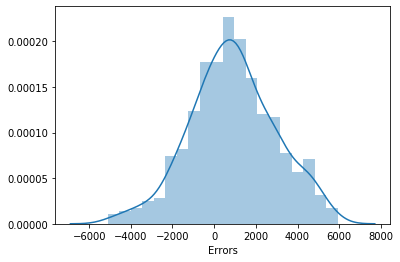

In [96]:
# Plotting histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
plt.xlabel("Errors")

From the above plot, we can clearly see that the error terms are normally distributed.